# **The Sparks Foundation**

## Ayush Kumar
### (Data Science & Business Analytics Intern)

### **GRIP Task #6 - Prediction using Decision Tree Algorithm**
Create a Decision Tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
import warnings
warnings.simplefilter('ignore')

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the dataset

In [3]:
dataset = pd.read_excel('Iris.xlsx')

## Performing EDA

In [4]:
df = dataset.copy()
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


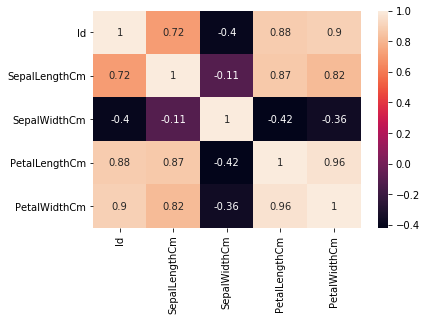

In [8]:
cormat = df.corr()
sns.heatmap(cormat, annot=True)

In [9]:
# Since the 'Id' column is of no use, we're going to drop it.
df.drop('Id', axis=1, inplace=True)

In [10]:
# Resampling the dataset in a random order -
df = df.sample(frac=1)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
85,6.0,3.4,4.5,1.6,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor
48,5.3,3.7,1.5,0.2,Iris-setosa
61,5.9,3.0,4.2,1.5,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor


In [11]:
# We will use the last 5 rows of the resampled data as our validation set.
data = df.iloc[0:145]
valid_set = df.iloc[145:150].drop('Species', axis=1)

## Splitting the dataset

In [12]:
X = data.drop('Species', axis=1)
y = data['Species']

In [13]:
# Performing train-test split -
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

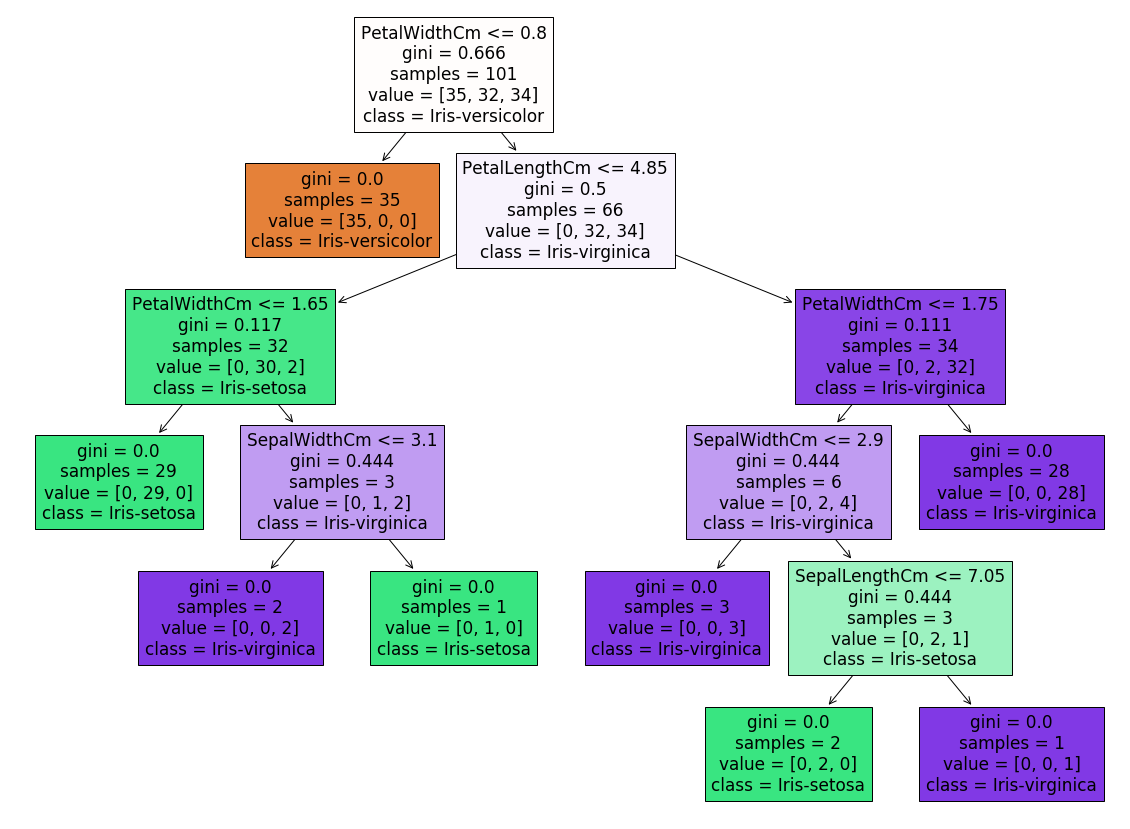

In [15]:
# Visualizing the Decision Tree -
from sklearn import tree
fig = plt.figure(figsize=(20, 15))
tree.plot_tree(dt, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                   class_names=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], filled=True)
plt.show()

In [16]:
y_pred = dt.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [18]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 14]], dtype=int64)

In [19]:
accuracy_score(y_test, y_pred)

0.9545454545454546

In [20]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.88      0.94        17
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.95        44
      macro avg       0.96      0.96      0.96        44
   weighted avg       0.96      0.95      0.95        44



In [21]:
# Performing K-Fold Cross Validation -
from sklearn.model_selection import cross_val_score
acc_score = np.mean(cross_val_score(dt, X, y, cv=10)) 
acc_score

0.9595238095238094

## Hyperparameter Tuning 

In [22]:
# Optimizing the parameters using GridSearchCV -

from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3, 4, 5],
           'min_samples_leaf': [1, 2, 3],
           'min_samples_split': [1, 2, 3],
           'max_features': [None, 'auto'] }

grid = GridSearchCV(estimator=dt, param_grid=params, cv=3, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [None, 'auto'],

In [23]:
grid.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [24]:
grid.best_score_

0.9725056689342403

In [35]:
# Now we will again build our classifier model using the optimal parameters that we've obtained -

clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=2, max_features='auto')
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
y_pred = clf.predict(X_test)

In [37]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]], dtype=int64)

In [38]:
accuracy_score(y_test, y_pred)

1.0

In [39]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        44
      macro avg       1.00      1.00      1.00        44
   weighted avg       1.00      1.00      1.00        44



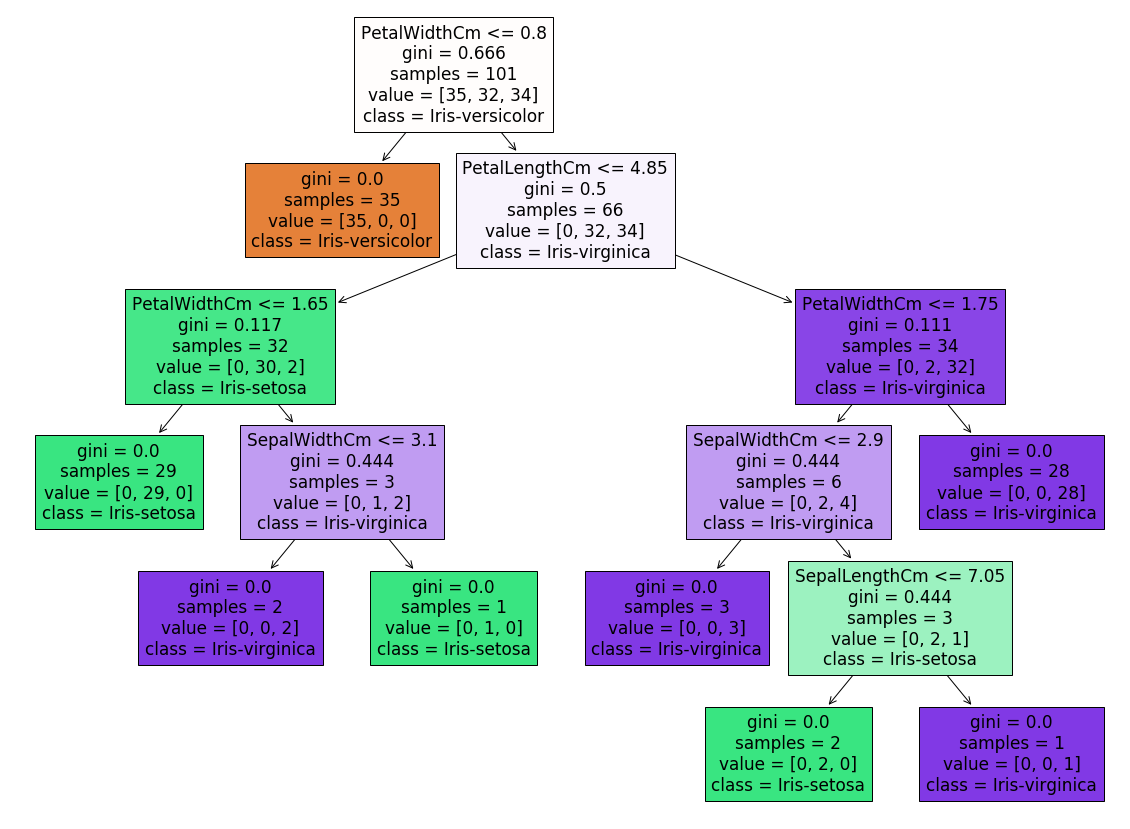

In [40]:
# Visualizing the Decision Tree -
from sklearn import tree
fig = plt.figure(figsize=(20, 15))
tree.plot_tree(dt, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                   class_names=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], filled=True)
plt.show()

In [41]:
# Testing our model on the validation set -
y_pred = clf.predict(valid_set)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

### As we can see that our model has performed really well on the task of classifying for the 'Iris' dataset giving an accuracy of 100% after optimizing the hyperparameters.
### Also, it was able to predict the right class of the data points in validation set.